In [1]:
import pandas as pd
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import gmaps
from config import gkey

In [2]:
#Imported all the DataFrames generated in the Data Cleaning Notebook.

all_df = pd.read_csv('Resources/alldata.csv')
company_df = pd.read_csv('Resources/companies.csv')
location_df = pd.read_csv('Resources/locations.csv')
type_df = pd.read_csv('Resources/jobtypes.csv')
cal_df = pd.read_csv('Resources/california.csv')

del all_df['Unnamed: 0']
del company_df['Unnamed: 0']
del location_df['Unnamed: 0']
del type_df['Unnamed: 0']
del cal_df['Unnamed: 0']

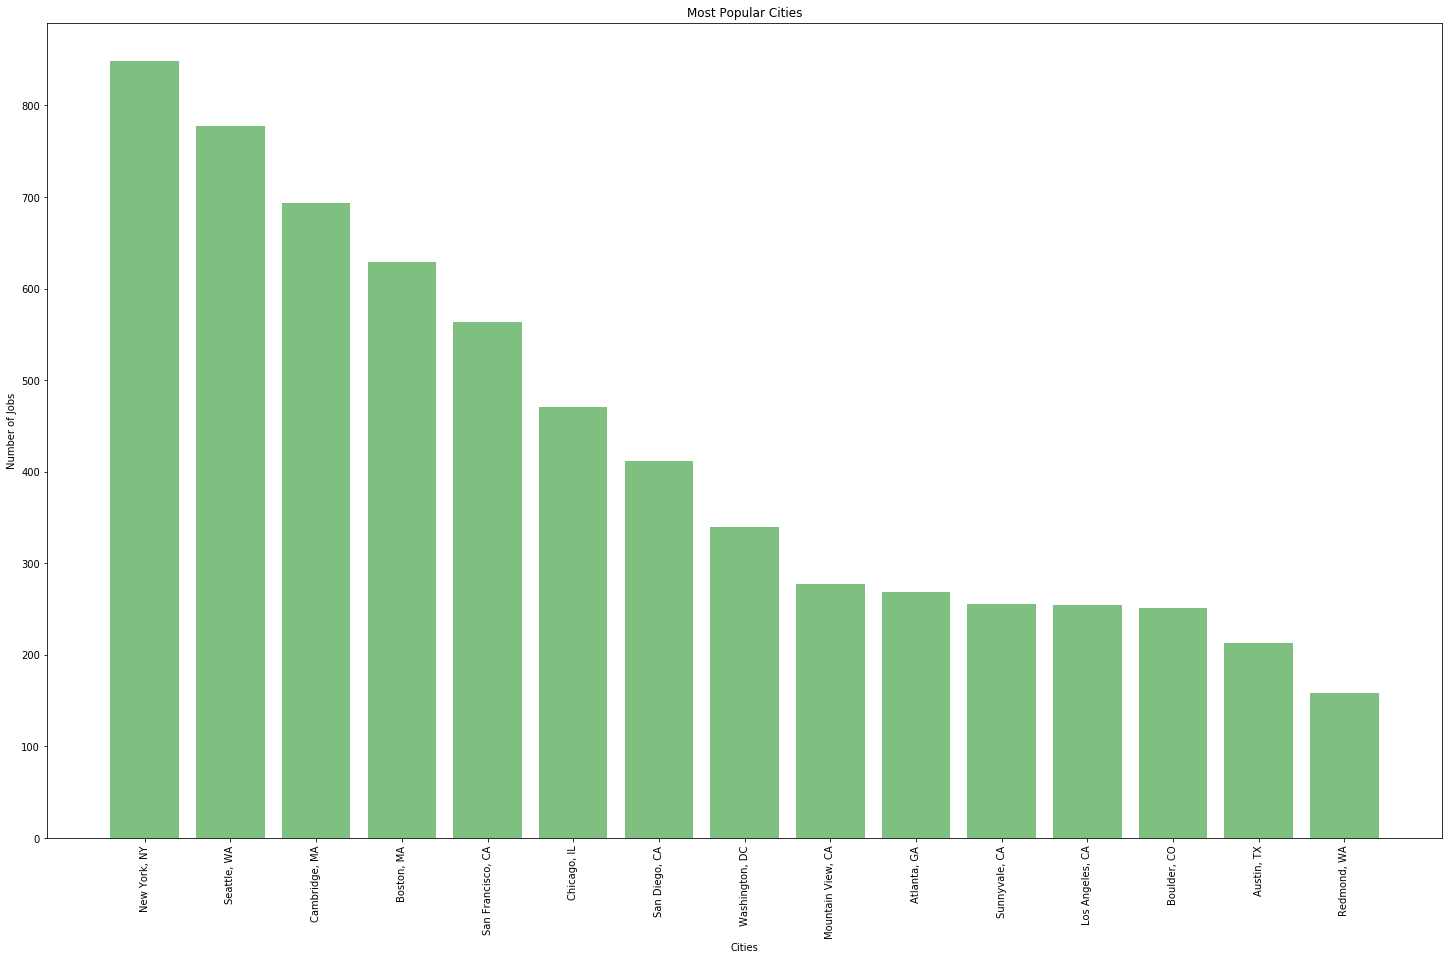

In [3]:
top15_df = location_df.sort_values(by=['Count'], ascending=False).head(15)

top_location_count = top15_df['Count']
location = np.arange(len(top15_df['Location']))

plt.figure(figsize=(25,15))
top_location_tick = [value for value in location]
plt.xticks(top_location_tick, top15_df['Location'])

plt.title("Most Popular Cities")
plt.xlabel("Cities")
plt.ylabel("Number of Jobs")
plt.xticks(rotation=90)

plt.bar(location, top_location_count, color='green', alpha=0.5, align="center")

plt.savefig("Images/MostPopularCities.png")
plt.show()

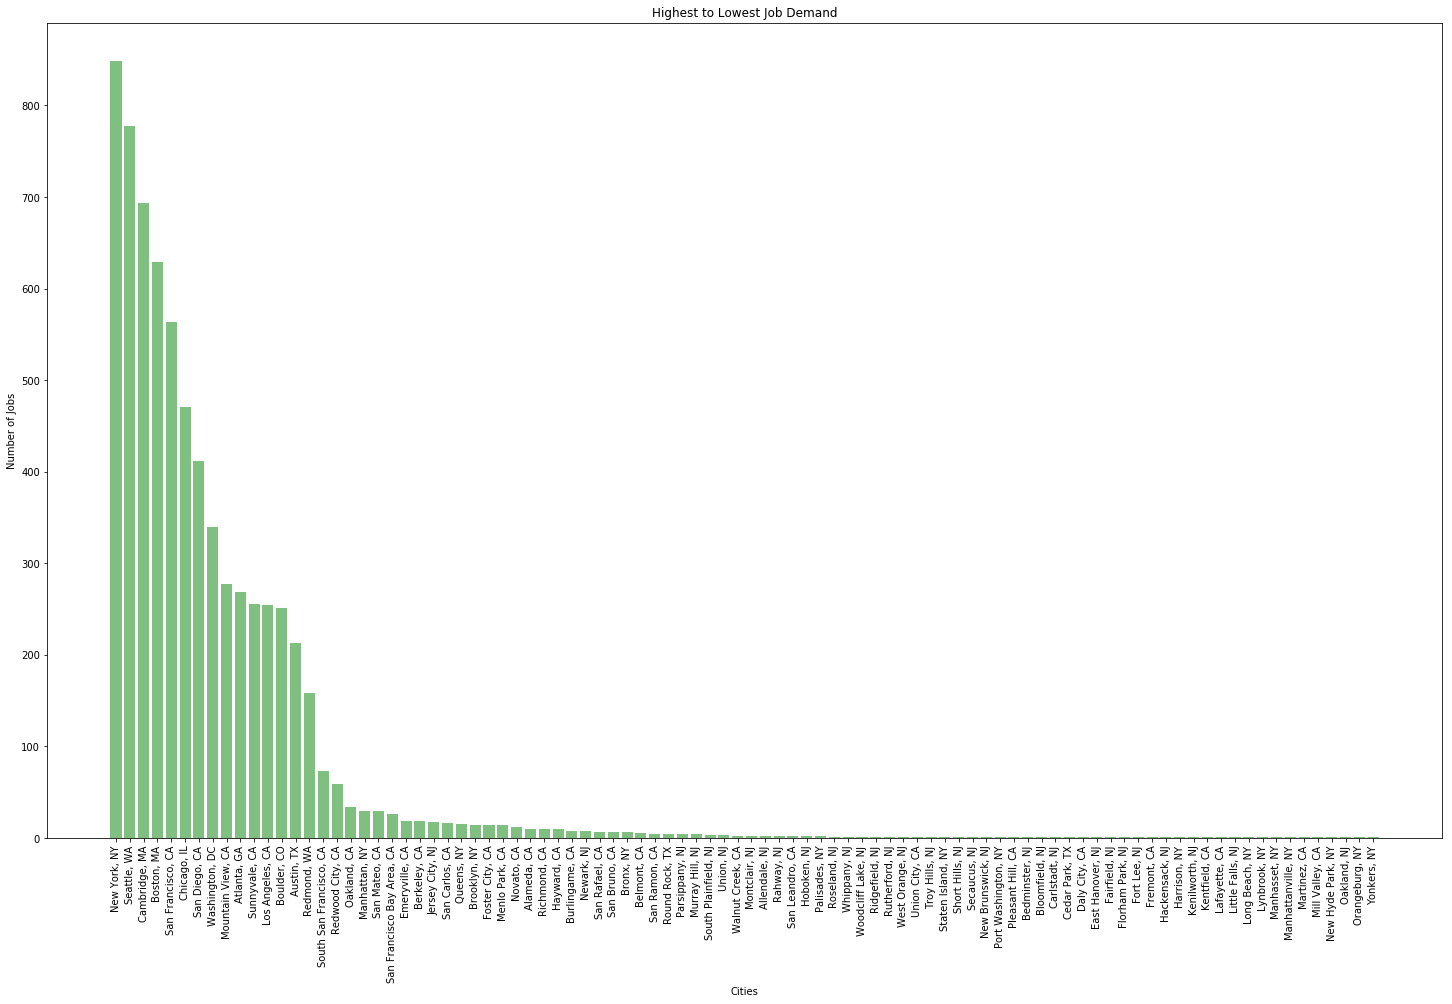

In [4]:
location_df = location_df.sort_values(by=['Count'], ascending=False)
location_count = location_df['Count']
location = np.arange(len(location_df['Location']))


plt.figure(figsize=(25,15))

location_tick = [value for value in location]
plt.xticks(location_tick, location_df['Location'])

plt.title("Highest to Lowest Job Demand")
plt.xlabel("Cities")
plt.ylabel("Number of Jobs")

plt.xticks(rotation=90)


plt.bar(location, location_count, color='green', alpha=0.5, align="center")

plt.savefig("Images/JobDemand.png")
plt.show()

In [18]:
cities = []
latitude = []
longitude = []

for city in location_df['Location']:
    target_city = city

    # Build URL using the Google Maps API
    target_url = f'https://maps.googleapis.com/maps/api/geocode/json?address={target_city}&key={gkey}'

    # Run request
    response = requests.get(target_url)

    # Convert to JSON
    seattle_geo = response.json()

    # Extract lat/lng
    lat = seattle_geo["results"][0]["geometry"]["location"]["lat"]
    lng = seattle_geo["results"][0]["geometry"]["location"]["lng"]

    # Print results
    print(f"{target_city}: {lat}, {lng}")
    
    print(city)
    
    cities.append(target_city)
    latitude.append(lat)
    longitude.append(lng)

print('finish')

New York, NY: 40.7127753, -74.0059728
New York, NY
Seattle, WA: 47.6062095, -122.3320708
Seattle, WA
Cambridge, MA: 42.3736158, -71.10973349999999
Cambridge, MA
Boston, MA: 42.3600825, -71.0588801
Boston, MA
San Francisco, CA: 37.7749295, -122.4194155
San Francisco, CA
Chicago, IL: 41.8781136, -87.6297982
Chicago, IL
San Diego, CA: 32.715738, -117.1610838
San Diego, CA
Washington, DC: 38.9071923, -77.0368707
Washington, DC
Mountain View, CA: 37.3860517, -122.0838511
Mountain View, CA
Atlanta, GA: 33.7489954, -84.3879824
Atlanta, GA
Sunnyvale, CA: 37.36883, -122.0363496
Sunnyvale, CA
Los Angeles, CA: 34.0522342, -118.2436849
Los Angeles, CA
Boulder, CO: 40.0149856, -105.2705456
Boulder, CO
Austin, TX: 30.267153, -97.7430608
Austin, TX
Redmond, WA: 47.6739881, -122.121512
Redmond, WA
South San Francisco, CA: 37.654656, -122.4077498
South San Francisco, CA
Redwood City, CA: 37.48521520000001, -122.2363548
Redwood City, CA
Oakland, CA: 37.8043637, -122.2711137
Oakland, CA
Manhattan, NY: 40

In [19]:
list_of_cities_df = pd.DataFrame({"Location" : cities, 
                                  "Latitude" : latitude,
                                  "Longitude" : longitude})

new_list_df = pd.merge(location_df, list_of_cities_df, on=["Location"])

new_list_df.head()


,Location,Count,Latitude,Longitude
0,"New York, NY",848,40.712775,-74.005973
1,"Seattle, WA",777,47.606209,-122.332071
2,"Cambridge, MA",694,42.373616,-71.109733
3,"Boston, MA",629,42.360082,-71.058880
4,"San Francisco, CA",564,37.774929,-122.419415


In [38]:
new_list_df.to_csv('coordinates.csv')

In [5]:
new_list_df = pd.read_csv('coordinates.csv')
# Store latitude and longitude in locations
locations = new_list_df[["Latitude", "Longitude"]]

# Fill NaN values and convert to float
rating = new_list_df["Count"].astype(float)

In [7]:
# Plot Heatmap
gmaps.configure(api_key = gkey)
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False, max_intensity=10,
                                 point_radius=0.5)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

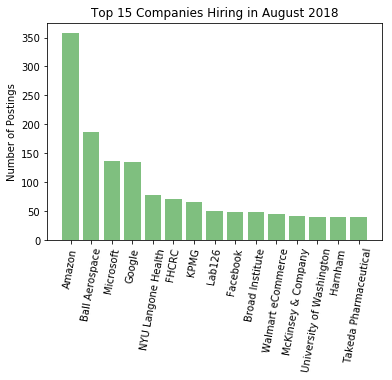

<Figure size 432x288 with 0 Axes>

In [22]:
#Create plot for company/position count 

company_x=company_df.sort_values("Positions", ascending=False).nlargest(15, "Positions")["Company"]
company_y=company_df.sort_values("Positions", ascending=False).nlargest(15, "Positions")["Positions"]
labels = ["Amazon", "Ball Aerospace", "Microsoft", "Google", "NYU Langone Health", "FHCRC", "KPMG", 
          "Lab126", "Facebook", "Broad Institute", "Walmart eCommerce", "McKinsey & Company", "University of Washington", 
          "Harnham", "Takeda Pharmaceutical"]

colors =["dodgerblue", "green", "firebrick", "cyan", "magenta", "gold", "mediumaquamarine", "pink", "purple", "lime", "teal", "salmon", "skyblue", "orange", "lavender"]

company_df=plt.bar(labels, company_y, color="green", alpha=.5, label=labels)
plt.xticks(rotation=80)
plt.title("Top 15 Companies Hiring in August 2018")
plt.ylabel("Number of Postings")

plt.show()
plt.savefig("Images/USATopHiringCompanies.png")

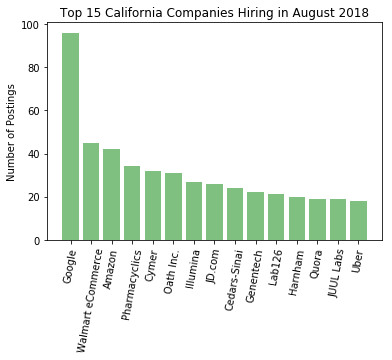

In [23]:
#Create plot for company/position count in California 

cal_x= cal_df["position"]

position = [96, 45, 42, 34, 32, 31, 27, 26, 24, 22, 21, 20, 19, 19, 18]

cal_labels = ["Google", "Walmart eCommerce", "Amazon", "Pharmacyclics", "Cymer", "Oath Inc.", "Illumina", 
          "JD.com", "Cedars-Sinai", "Genentech", "Lab126", "Harnham", "Quora", 
          "JUUL Labs", "Uber"]

company_df=plt.bar(cal_labels, position, color="green", alpha=.5, label=cal_labels)

plt.xticks(rotation=80)

plt.ylabel("Number of Postings")
plt.title("Top 15 California Companies Hiring in August 2018")

plt.savefig("Images/CaliforniaTopHiringCompanies.png")
plt.show()


In [24]:
type_df['type'].value_counts()

Misc.             3528
Engineer          1354
Data Scientist    1261
Data Analyst       885
Name: type, dtype: int64

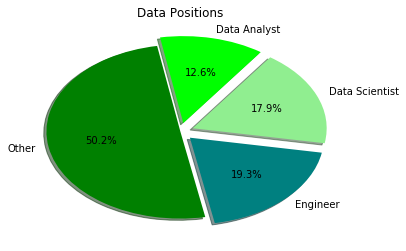

In [25]:
labels = ["Other", "Engineer", "Data Scientist", "Data Analyst"]
sizes = [3528, 1354, 1261, 885]
colors = ["green", "teal", "lightgreen", "lime"]
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=100, explode=[0,.1,.1,.1])
plt.title("Data Positions")
plt.savefig("Images/JobsByType.png")

In [26]:
#Created a function to search all job descriptions for specific terms or phrases.

def wordsearch(searchterms):
    word_counts = []
    for word in searchterms:
        word_counts.append(0)
        for i in range(len(all_df)):
            if str(word).lower() in all_df.iloc[i,2].lower():
                word_counts[-1] += 1
    return(word_counts)

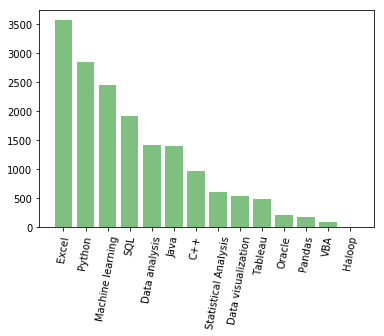

In [27]:
searchterms = ['Excel', 'Python', 'Pandas', 'Machine learning', 'SQL', 'Data analysis', 'Data visualization', 'Statistical Analysis', 'C++', 'Java', 'Haloop','Oracle' , 'Tableau', 'VBA' ]
valuable_skills = pd.DataFrame({'Keyword': searchterms, 'Count':wordsearch(searchterms)}).sort_values("Count", ascending = False)
valuable_skills

plt.bar( valuable_skills['Keyword'] , valuable_skills['Count'] , color='green', alpha=0.5, align="center")
plt.xticks(rotation=80)
plt.savefig("Images/TopSkillsInDemand.png")
plt.show()

In [28]:
searchterms = ['Bachelor','Master','PhD', 'Ph.D', 'M.A', 'B.A', 'BSc.','Diploma',]
degree_df = pd.DataFrame({'Keyword': searchterms, 'Count':wordsearch(searchterms)})
degree_df

,Keyword,Count
0,Bachelor,2120
1,Master,2049
2,PhD,1724
3,Ph.D,942
4,M.A,27
5,B.A,50
6,BSc.,3
7,Diploma,172


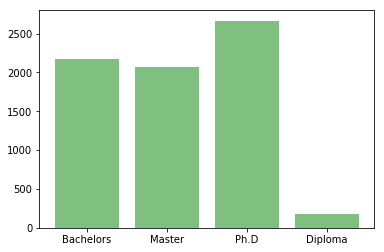

In [29]:
word_list = ['Bachelors', 'Master', 'Ph.D', 'Diploma']
word_counts = [degree_df['Count'].iloc[0] + degree_df['Count'].iloc[5] + degree_df['Count'].iloc[6], degree_df['Count'].iloc[1] + degree_df['Count'].iloc[4], degree_df['Count'].iloc[2] + degree_df['Count'].iloc[3], degree_df["Count"].iloc[7]]

plt.bar( word_list , word_counts , color='green', alpha=0.5, align="center")

plt.savefig("Images/DegreeDemand.png")